In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime as dt

warnings.filterwarnings('ignore', category=Warning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Import Hourly Dataset
df = pd.read_csv('./Cleaned_Data/LMP_and_feature_data.csv', index_col=0)
df.index = pd.to_datetime(df.index,  utc=True)
df.index = df.index.tz_convert("America/Los_Angeles")

In [3]:
df.head()

,RT_LMP,RT_MCC,RT_MCE,RT_MCL,RT_MGHG,DA_LMP,DA_MCC,DA_MCE,DA_MCL,DA_MGHG,Export,Generation,Import,NP15_Solar_Renewable_Forecast_Actual_Generation,NP15_Wind_Renewable_Forecast_Actual_Generation,SP15_Solar_Renewable_Forecast_Actual_Generation,SP15_Wind_Renewable_Forecast_Actual_Generation,ZP26_Solar_Renewable_Forecast_Actual_Generation,NP15_Solar_Renewable_Forecast_Day_Ahead,NP15_Wind_Renewable_Forecast_Day_Ahead,SP15_Solar_Renewable_Forecast_Day_Ahead,SP15_Wind_Renewable_Forecast_Day_Ahead,ZP26_Solar_Renewable_Forecast_Day_Ahead,temperature_2m,RTLMP_spike_50_binary,RTLMP_spike_75_binary,RTLMP_spike_100_binary,RTLMP_spike_150_binary,friday,weekend,hour,on_peak_hour,month,Total_Solar_Actual,Total_Solar_Forecast,Total_Wind_Actual,Total_Wind_Forecast,Total_Wind_Solar_Actual,Total_Wind_Solar_Forecast,renew_forecast_error,solar_forecast_error,wind_forecast_error,lagged_2hr_RT_LMP,lagged_4hr_RT_LMP,lagged_12hr_RT_LMP,lagged_20hr_RT_LMP,lagged_22hr_RT_LMP,lagged_23hr_RT_LMP,lagged_2hr_DA_LMP,lagged_4hr_DA_LMP,lagged_12hr_DA_LMP,lagged_20hr_DA_LMP,lagged_22hr_DA_LMP,lagged_23hr_DA_LMP,lagged_2hr_renew_forecast_error,lagged_4hr_renew_forecast_error,lagged_12hr_renew_forecast_error,lagged_20hr_renew_forecast_error,lagged_22hr_renew_forecast_error,lagged_23hr_renew_forecast_error,lagged_2hr_Export,lagged_4hr_Export,lagged_12hr_Export,lagged_20hr_Export,lagged_22hr_Export,lagged_23hr_Export,lagged_2hr_Generation,lagged_4hr_Generation,lagged_12hr_Generation,lagged_20hr_Generation,lagged_22hr_Generation,lagged_23hr_Generation,lagged_2hr_Import,lagged_4hr_Import,lagged_12hr_Import,lagged_20hr_Import,lagged_22hr_Import,lagged_23hr_Import,lagged_2hr_temp,lagged_4hr_temp,lagged_12hr_temp,lagged_22hr_temp,lagged_23hr_temp,sin_month,cos_month,sin_hour,cos_hour,DA_LMP_in_12_hrs,DA_LMP_in_2_hrs,RT_LMP_in_12_hrs,RT_LMP_in_2_hrs,target_hour,target_friday,target_weekend,target_month,target_sin_month,target_cos_month,target_sin_hour,target_cos_hour
2020-04-20 01:00:00-07:00,15.467644,0.0,15.515472,-0.047827,0.0,20.64034,0.0,20.47856,0.16178,NaN,1635.225000,13223.085000,6624.413333,-3.71545,921.76969,-24.67823,2868.23068,-4.31265,0.0,580.64,0.0,2418.63,0.0,57.668000,0,0,0,0,0,0,1,0,4,-32.70633,0.0,3790.00037,2999.27,3757.29404,2999.27,758.02404,-32.70633,790.73037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.866025,-0.5,0.258819,0.965926,16.60483,20.53888,20.768937,18.769981,3.0,0.0,0.0,4.0,0.866025,-0.5,0.707107,7.071068e-01
2020-04-20 02:00:00-07:00,17.830759,0.0,18.047457,-0.216696,0.0,20.44476,0.0,20.33292,0.11183,NaN,1456.467500,12812.826667,6392.300000,-3.71597,884.54427,-24.90288,2974.36937,-4.47797,0.0,695.53,0.0,2385.73,0.0,57.488000,0,0,0,0,0,0,2,0,4,-33.09682,0.0,3858.91364,3081.26,3825.81682,3081.26,744.55682,-33.09682,777.65364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.866025,-0.5,0.500000,0.866025,9.89109,23.02540,15.283187,19.736117,4.0,0.0,0.0,4.0,0.866025,-0.5,0.866025,5.000000e-01
2020-04-20 03:00:00-07:00,18.769981,0.0,19.070217,-0.300238,0.0,20.53888,0.0,20.44890,0.08998,NaN,1537.831667,12584.230000,6471.974167,-3.71498,866.61634,-27.01724,2790.53242,-4.78721,0.0,790.53,0.0,2350.11,0.0,57.128000,0,0,0,0,0,0,3,0,4,-35.51943,0.0,3657.14876,3140.64,3621.62933,3140.64,480.98933,-35.51943,516.50876,15.467644,NaN,NaN,NaN,NaN,NaN,20.64034,NaN,NaN,NaN,NaN,NaN,758.02404,NaN,NaN,NaN,NaN,NaN,1635.225000,NaN,NaN,NaN,NaN,NaN,13223.085000,NaN,NaN,NaN,NaN,NaN,6624.413333,NaN,NaN,NaN,NaN,NaN,57.668,NaN,NaN,NaN,NaN,0.866025,-0.5,0.707107,0.707107,11.96682,25.60744,64.724663,16.848482,5.0,0.0,0.0,4.0,0.866025,-0.5,0.965926,2.588190e-01
2020-04-20 04:00:00-07:00,19.736117,0.0,20.064863,-0.328745,0.0,23.02540,0.0,22.81550,0.20990,NaN,1476.224167,13251.485833,6437.381667,-3.70311,790.24366,-27.92590,2560.76850,-4.82

In [4]:
df.columns = ['_'.join(colname.split()) for colname in df.columns]
df.columns = [colname.replace('-','_') for colname in df.columns]

In [5]:
df.isna().sum()[df.isna().sum() > 0]

DA_MGHG                                            6047
NP15_Solar_Renewable_Forecast_Actual_Generation       5
NP15_Wind_Renewable_Forecast_Actual_Generation        6
SP15_Solar_Renewable_Forecast_Actual_Generation       5
SP15_Wind_Renewable_Forecast_Actual_Generation        5
ZP26_Solar_Renewable_Forecast_Actual_Generation       5
Total_Solar_Actual                                    5
Total_Wind_Actual                                     6
Total_Wind_Solar_Actual                               6
renew_forecast_error                                  6
solar_forecast_error                                  5
wind_forecast_error                                   6
lagged_2hr_RT_LMP                                   165
lagged_4hr_RT_LMP                                   325
lagged_12hr_RT_LMP                                  965
lagged_20hr_RT_LMP                                 1605
lagged_22hr_RT_LMP                                 1765
lagged_23hr_RT_LMP                              

# View distribution of variables

Here I rename some of the most relevant variables for the analysis. Note that Real Time LMP is an approximation of \\$\/ MWh because it is an average of 5-minute \\$\/ MWh prices

In [6]:
df.rename({'RT_LMP':'Real_Time_LMP (Avg $/MWh)', 'DA_LMP':'Day_Ahead_LMP ($/MWh)', 
           'renew_forecast_error':'Renewable_Energy_Forecast_Error (MW)', 'Export':'Export (MW)', 
           'Import':'Import (MW)', 'Generation':'Generation (MW)', 'Total_Wind_Solar_Actual':'Total_Wind_Solar_Actual (MW)', 
           'Renewable_Energy_Forecast_Error':'Renewable_Energy_Forecast_Error (MW)', 'Renewable_Energy_Forecast_Error':'Renewable_Energy_Forecast_Error (MW)',
           'Total_Wind_Solar_Actual':'Total_Wind_Solar_Actual (MW)', 'Total_Wind_Solar_Forecast':'Total_Wind_Solar_Forecast (MW)'}, axis=1, inplace=True)

view_cols = ['Real_Time_LMP (Avg $/MWh)', 'Day_Ahead_LMP ($/MWh)', 'Export (MW)', 
             'Generation (MW)', 'Import (MW)', 'Total_Wind_Solar_Actual (MW)', 
             'Renewable_Energy_Forecast_Error (MW)']

Unsurprisingly, Real-Time and Day-Ahead LMP's have huge maximums, but most of the values are under $100

In [7]:
df[view_cols].describe()

,Real_Time_LMP (Avg $/MWh),Day_Ahead_LMP ($/MWh),Export (MW),Generation (MW),Import (MW),Total_Wind_Solar_Actual (MW),Renewable_Energy_Forecast_Error (MW)
count,26827.000000,26827.000000,26827.000000,26827.000000,26827.000000,26821.000000,26821.000000
mean,55.334747,63.048171,2582.018365,19249.562118,8324.979662,5384.166566,-597.257150
std,67.720504,67.827603,1451.292841,5342.580603,2164.039711,4416.044105,998.990029
min,-150.220246,-43.957250,523.900909,9135.009167,2907.863333,-40.973720,-10064.099260
25%,24.887817,30.937935,1556.611250,15604.471250,6586.942083,1702.250580,-882.064120
50%,42.570467,49.760490,2203.836667,18387.745000,8401.515833,3503.340600,-342.324650
75%,67.061443,75.216915,3145.128333,21529.174167,10078.419167,9529.193010,-31.487900
max,1797.564817,1532.963000,12095.536667,43624.312500,14594.985833,17703.296810,2915.011190


In [8]:
# How many times higher is the max RT_LMP compared to the median?
df_describe = df[view_cols].describe()
rtlmp_max_multiple = df_describe['Real_Time_LMP (Avg $/MWh)'].loc['max'] / df_describe['Real_Time_LMP (Avg $/MWh)'].loc['50%']

print(f'The max RT Energy Price is {int(rtlmp_max_multiple)} times as high as the median price.')

The max RT Energy Price is 42 times as high as the median price.


Plotting the LMP variables in a boxplot shows an extreme degree of skewdness for LMP. By default, seaborn considers data that is 1.5x the size of the inter-quartile range to be an outlier (represented by the dots outside the top whisker)

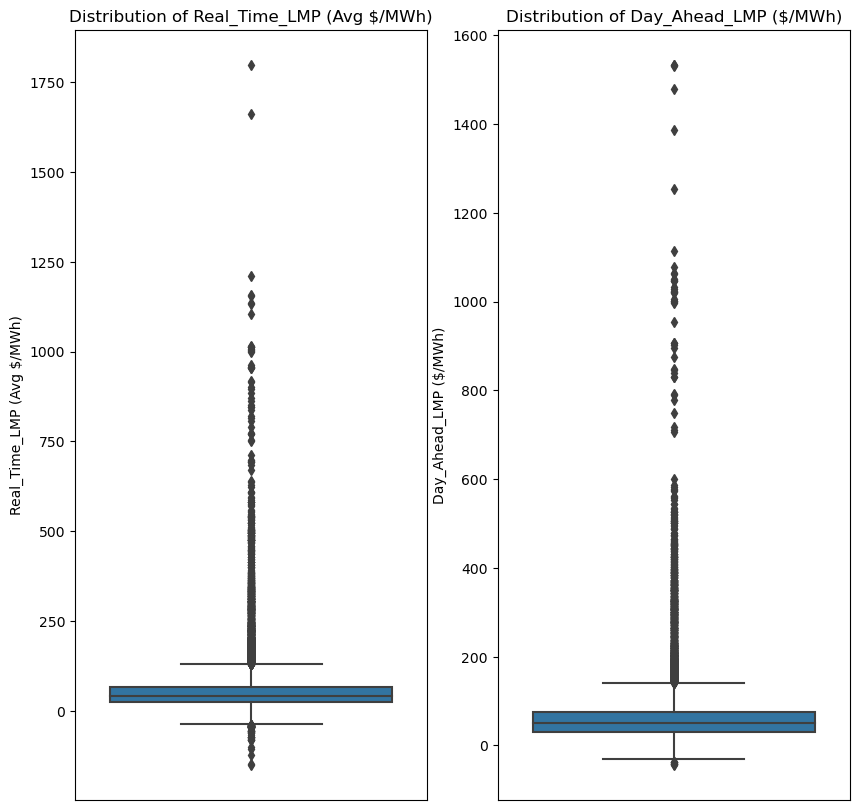

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))

features = ['Real_Time_LMP (Avg $/MWh)', 'Day_Ahead_LMP ($/MWh)']

for feature, subplot in zip(features, ax.flatten()):
    sns.boxplot(df[feature], ax=subplot, orient='v')
    subplot.title.set_text(f'Distribution of {feature}')
    subplot.set_xlabel("")
    subplot.set_ylabel(feature)
    subplot.set_xticks([])
    # subplot.set_ylim(0,950)
  
plt.savefig('LMP_Dist.png', bbox_inches='tight')
plt.show()

Text(0.5, 0.98, 'Distribution of Grid / Price Variables')

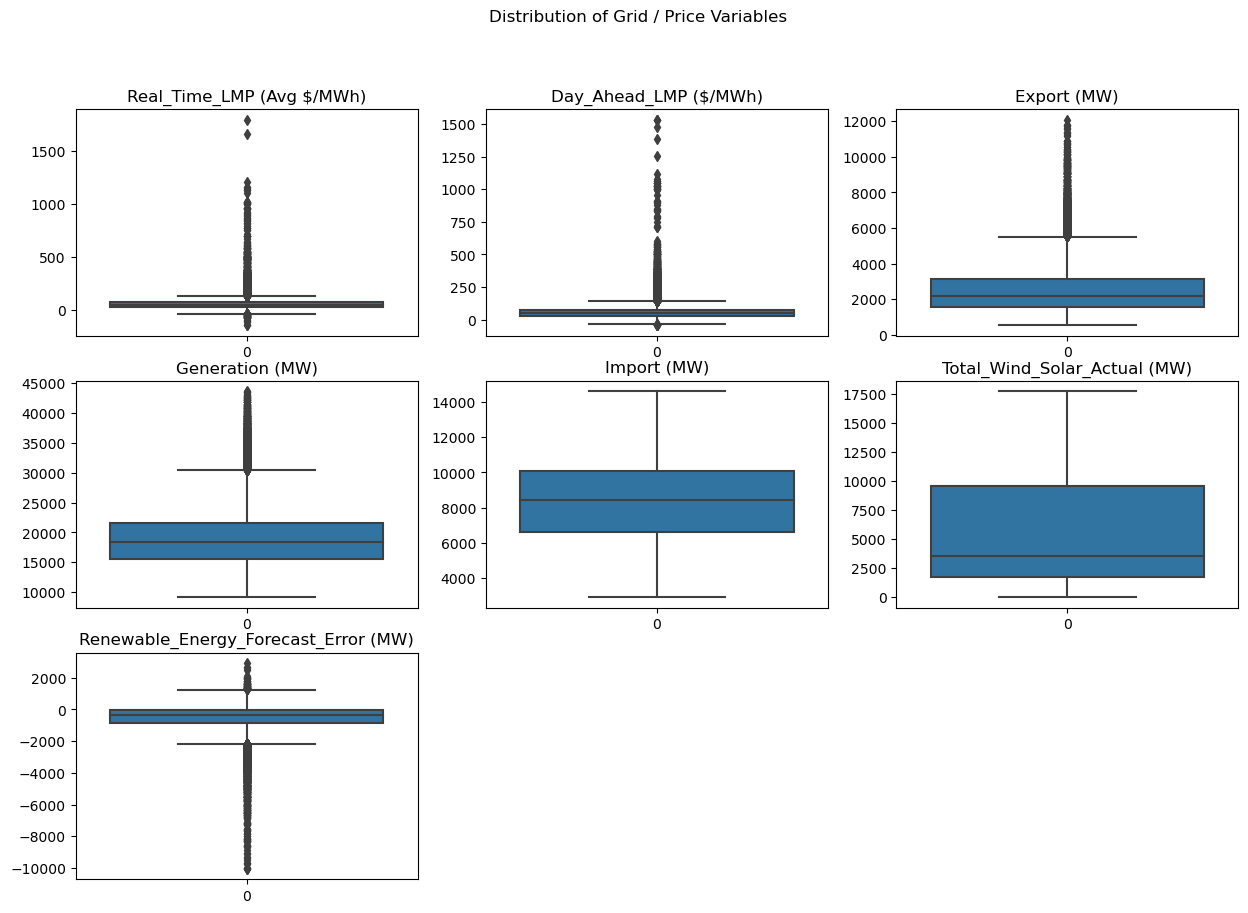

In [10]:
fig, axes = plt.subplots(3, 3)

for i, j in enumerate(list(df[view_cols].columns.values)):
    # a = df.boxplot(j, ax = axes.flatten()[i], fontsize='large')
    a = sns.boxplot(df[j], ax=axes.flatten()[i])
    a.title.set_text(f'{view_cols[i]}')

fig.set_size_inches(15, 10)
axes[2,1].set_visible(False)
axes[2,2].set_visible(False)
fig.suptitle('Distribution of Grid / Price Variables')

The extreme swings in RTLMP tend to hide the non-outlier distribution of the LMP. Let's look at the distribution for data under the 75th percentile

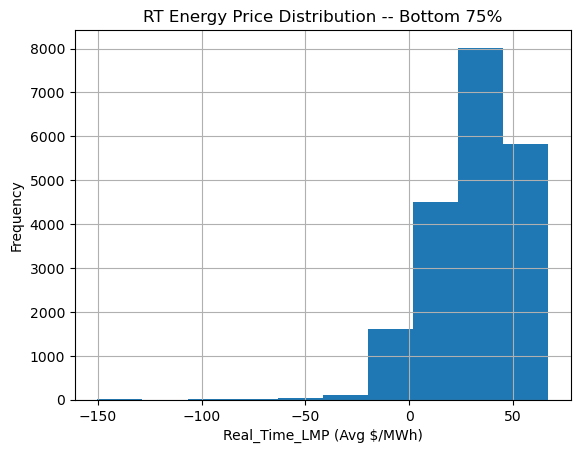

In [11]:
# Looking at data subset by RTLMP <= 75 percentile
RT_LMP_75_pct = df['Real_Time_LMP (Avg $/MWh)'].describe()['75%']
df_RTLMP_75pct = df[df['Real_Time_LMP (Avg $/MWh)'] <= RT_LMP_75_pct]

df_RTLMP_75pct['Real_Time_LMP (Avg $/MWh)'].hist()
plt.xlabel('Real_Time_LMP (Avg $/MWh)')
plt.ylabel('Frequency')
plt.title('RT Energy Price Distribution -- Bottom 75%')
plt.show()

## Autocorrelation Function

Based on the results of the test below, we can **reject the null hypothesis that the time series is non-stationary**

In [12]:
# First, test whether the time series is stationary

stationary_test = adfuller(df['Real_Time_LMP (Avg $/MWh)'])
print('ADF Statistic:', stationary_test[0])
print('p-value:', stationary_test[1])
print('Critical Values:', stationary_test[4])                      

ADF Statistic: -8.236151327302231
p-value: 5.882790066961424e-13
Critical Values: {'1%': -3.4305942367327207, '5%': -2.8616479455568817, '10%': -2.566827456208816}


Unsurprisingly, autocorrelation spikes at 24-hour intervals

<Figure size 1000x400 with 0 Axes>

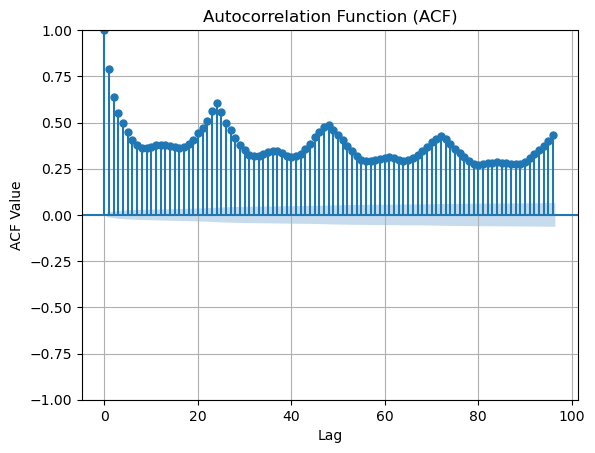

In [13]:
plt.figure(figsize=(10, 4))
plot_acf(df['Real_Time_LMP (Avg $/MWh)'], lags=96) 
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF Value')
plt.grid(True)

# Bivariate Data Analysis

## Grid / Energy Variables

In [14]:
non_RTLMP_view_cols = ['Day_Ahead_LMP ($/MWh)', 'Export (MW)', 'Generation (MW)', 
                       'Import (MW)', 'Total_Wind_Solar_Actual (MW)', 
                       'Renewable_Energy_Forecast_Error (MW)']

Because we are dealing with a prediction problem, we can analyze the relationship between current variabes and future RT_LMP

In [15]:
def create_shifted_series(df, col_name, shift_hours):
    """Create a column of col_name that is shifted 'shift_hours' in the future"""
    shifted_series = pd.Series(index=df.index)

    for idx, row in df.iterrows():
        shifted_time = idx + pd.Timedelta(hours=shift_hours)
        
        if shifted_time in df.index:
            shifted_value = df.loc[shifted_time, col_name]
        else:
            shifted_value = None
        
        shifted_series[idx] = shifted_value

    return shifted_series

In [16]:
df['Real_Time_LMP_in_2_hrs (Avg $/MWh)'] = create_shifted_series(df=df, col_name='Real_Time_LMP (Avg $/MWh)', shift_hours=2)

As expected, Real Time LMP increases with Day-Ahead LMP.

Interestingly, generation tends to be banded around 20,000 MW and 35,000-40,000 MW during episodes of high LMP. This may relate to different times of day that drive high energy prices

I was personally surprised that renewable forecast error tends towards 0 during periods of high LMP. However, this may be because forecast error is lower for periods of low renewable generation on the grid, which in turn may be periods during which LMP soars.

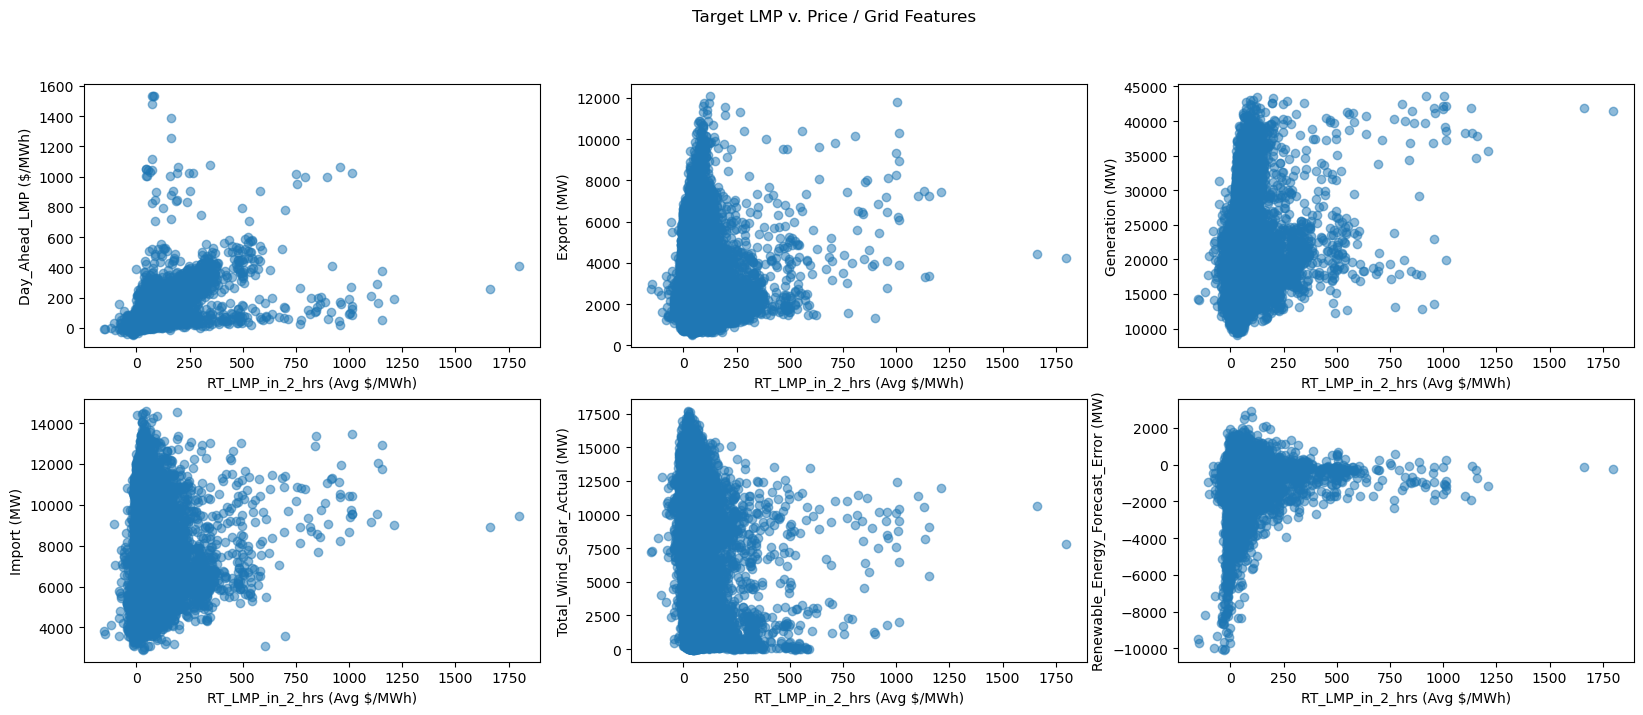

In [17]:
fig, ax = plt.subplots(2, 3, figsize=(20, 7.5))

for i, y in enumerate(non_RTLMP_view_cols):
    row = i // 3
    col = i % 3
    
    ax[row, col].scatter(df['Real_Time_LMP_in_2_hrs (Avg $/MWh)'], df[y], alpha=0.5)
    ax[row, col].set_xlabel('RT_LMP_in_2_hrs (Avg $/MWh)')
    ax[row, col].set_ylabel(f'{y}')
    
fig.suptitle('Target LMP v. Price / Grid Features')
plt.show()

Another View of the relationship between Day Ahead and Real-Time prices. While many Real-Time price spikes are accompanied by a Day-Ahead price spike, there are numerous occasions where only the Real-Time price spikes.

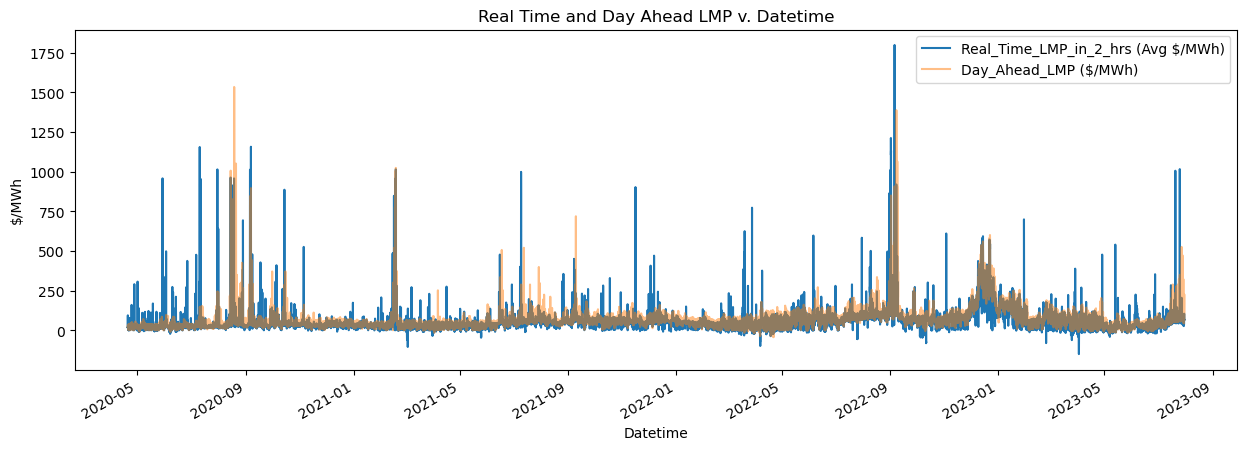

In [18]:
plt.figure(figsize=(15,5))
df['Real_Time_LMP_in_2_hrs (Avg $/MWh)'].plot()
df['Day_Ahead_LMP ($/MWh)'].plot(alpha=0.5)

plt.xlabel('Datetime')
plt.ylabel('$/MWh')
plt.title('Real Time and Day Ahead LMP v. Datetime')
plt.legend()
plt.show()

In [19]:
view_cols = ['Real_Time_LMP_in_2_hrs (Avg $/MWh)', 'Day_Ahead_LMP ($/MWh)', 'Export (MW)', 
             'Generation (MW)', 'Import (MW)', 'Total_Wind_Solar_Actual (MW)', 
             'Renewable_Energy_Forecast_Error (MW)']

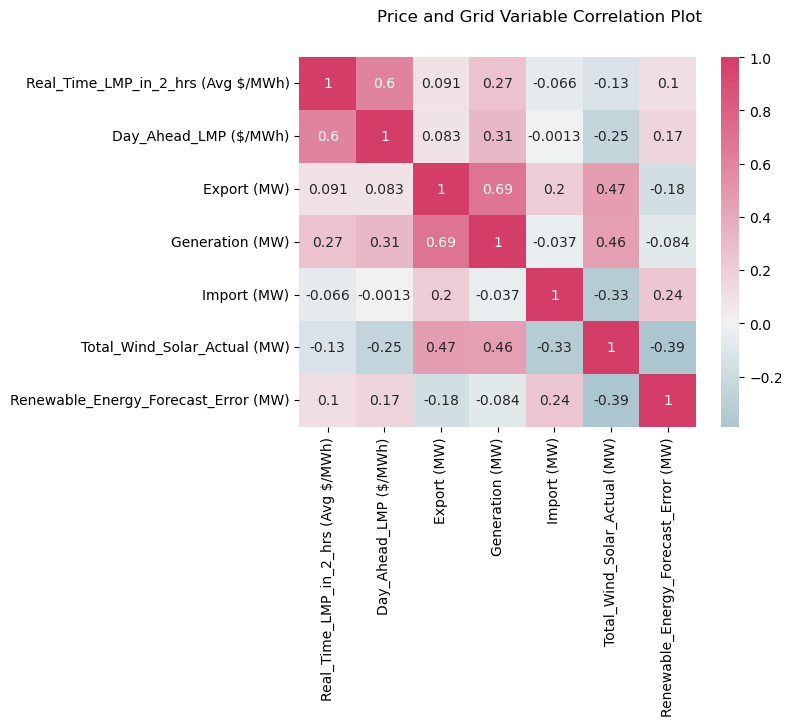

In [20]:
cmap = sns.diverging_palette(220, 0, as_cmap=True)
fig = sns.heatmap(df[view_cols].corr(), center=0, cmap=cmap, annot=True).get_figure()
fig.suptitle('Price and Grid Variable Correlation Plot')
fig.savefig('corr_heatmap.png', bbox_inches='tight')

Examining data points where Real Time LMP is less than $150 / MWh. Interestingly, many of the patterns observed above disappear.

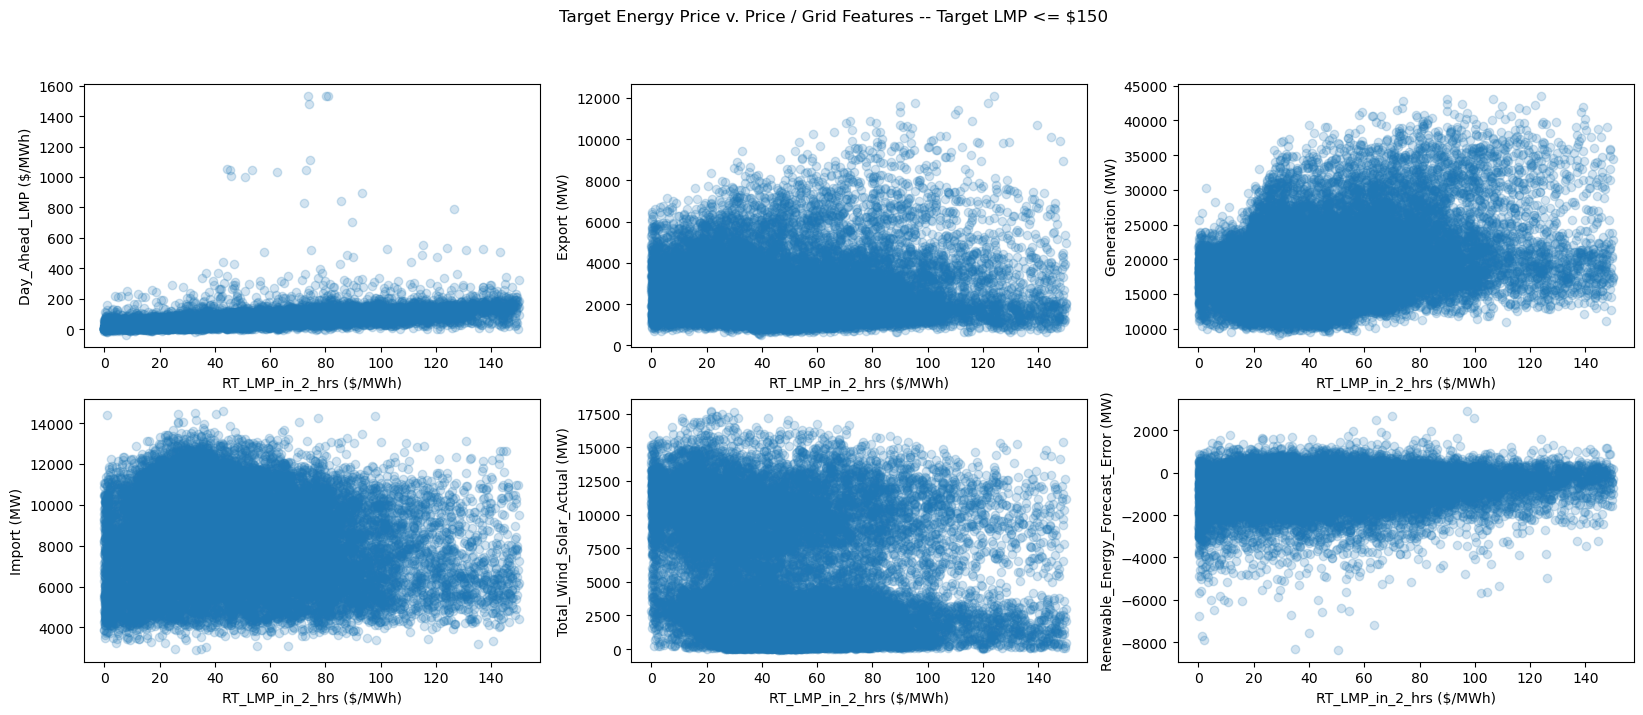

In [21]:
df_RTLMP_under150 = df[(df['Real_Time_LMP_in_2_hrs (Avg $/MWh)'] <= 150) & (df['Real_Time_LMP_in_2_hrs (Avg $/MWh)'] > 0)]

fig, ax = plt.subplots(2, 3, figsize=(20, 7.5))

for i, y in enumerate(non_RTLMP_view_cols):
    row = i // 3
    col = i % 3
    
    ax[row, col].scatter(df_RTLMP_under150['Real_Time_LMP_in_2_hrs (Avg $/MWh)'], df_RTLMP_under150[y], alpha=0.2)
    ax[row, col].set_xlabel('RT_LMP_in_2_hrs ($/MWh)')
    ax[row, col].set_ylabel(f'{y}')

fig.suptitle('Target Energy Price v. Price / Grid Features -- Target LMP <= $150')
plt.show()

In [22]:
df['month_name'] = df['month'].apply(lambda x: calendar.month_abbr[x])

As expected, prices tend to be higher in Winter and late Summer. December average prices and volatility increased significantly between 2020 and 2022.

In [23]:
med_lmp_by_month = df.groupby('month_name').median()[['Real_Time_LMP (Avg $/MWh)', 'month']].rename({'Real_Time_LMP (Avg $/MWh)':'Median RTLMP ($/MWh)'}, axis=1)
avg_lmp_by_month = df.groupby('month_name').mean()[['Real_Time_LMP (Avg $/MWh)']].rename({'Real_Time_LMP (Avg $/MWh)':'Average RTLMP ($/MWh)'}, axis=1)
lmp_by_month = pd.merge(med_lmp_by_month, avg_lmp_by_month, left_index=True, right_index=True).sort_values('month')[['Median RTLMP ($/MWh)', 'Average RTLMP ($/MWh)']]

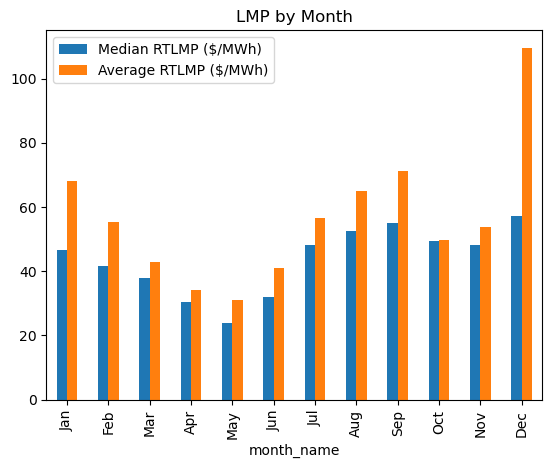

In [24]:
lmp_by_month.plot.bar()
plt.title('LMP by Month')
plt.show()

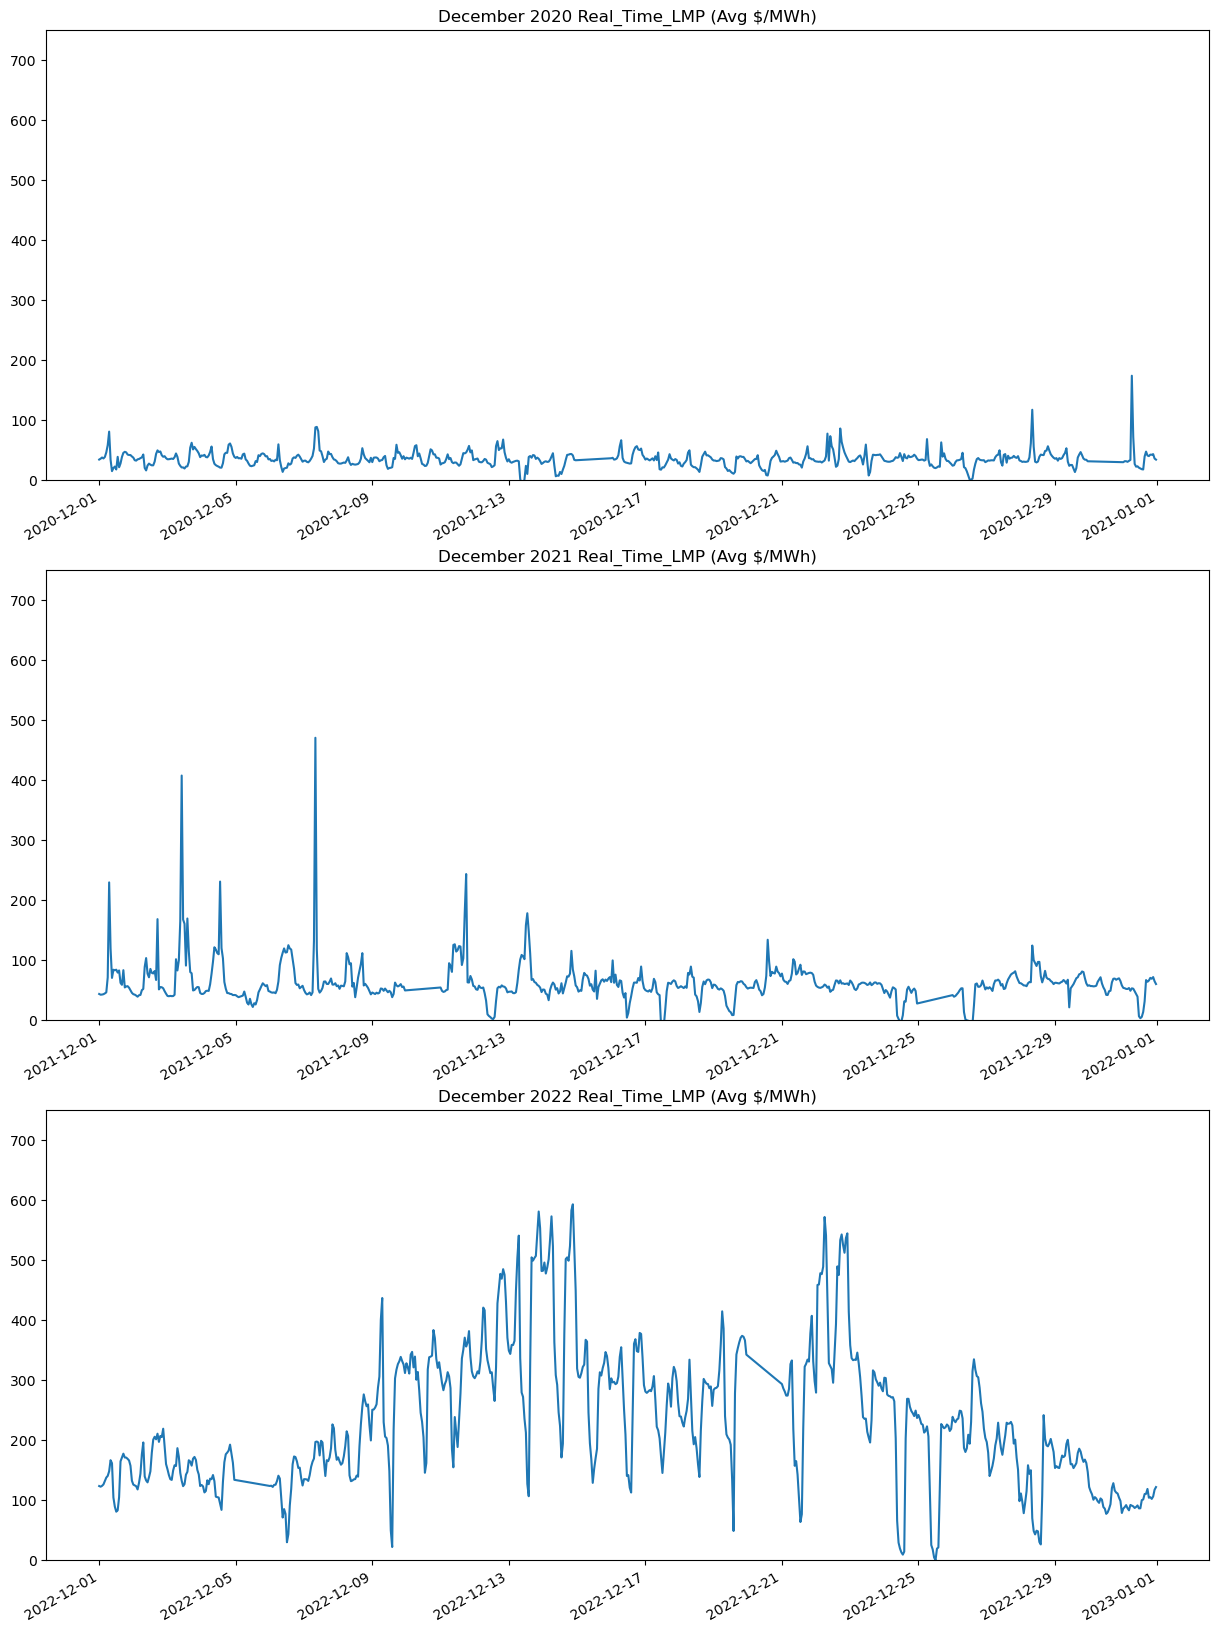

In [25]:
dec_df = df[df['month_name'] == 'Dec']

fig, axs = plt.subplots(3,1, figsize=(15, 22.5))
year_list = [2020, 2021, 2022]

for i in range(3):
    dec_df_year = dec_df[dec_df.index.year == year_list[i]]
    dec_df_year['Real_Time_LMP (Avg $/MWh)'].plot(ax=axs[i])
    axs[i].set_title(f'December {year_list[i]} Real_Time_LMP (Avg $/MWh)')
    axs[i].set_ylim(0,750)

In [26]:
day_dict = {0:'Mon', 1:'Tues', 2:'Wed', 3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'} 

df['weekday_num'] = df.index.weekday
df['weekday'] = df['weekday_num'].map(day_dict)

In [27]:
df['weekday_num'] = df.index.weekday

med_lmp_by_day = df.drop('month_name', axis=1).groupby('weekday').median()[['Real_Time_LMP (Avg $/MWh)', 'weekday_num']].rename({'Real_Time_LMP (Avg $/MWh)':'Median RTLMP ($/MWh)'}, axis=1)
avg_lmp_by_day = df.drop('month_name', axis=1).groupby('weekday').mean()[['Real_Time_LMP (Avg $/MWh)']].rename({'Real_Time_LMP (Avg $/MWh)':'Average RTLMP ($/MWh)'}, axis=1)
lmp_by_day = pd.merge(med_lmp_by_day, avg_lmp_by_day, left_index=True, right_index=True).sort_values('weekday_num')[['Median RTLMP ($/MWh)', 'Average RTLMP ($/MWh)']]

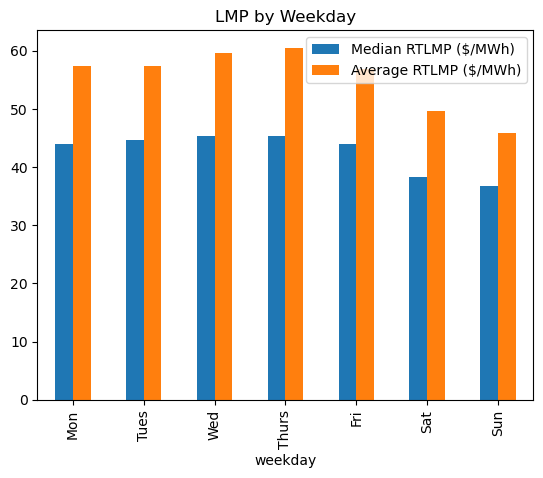

In [28]:
lmp_by_day.plot.bar()
plt.title('LMP by Weekday')
plt.show()

Plotting Real Time LMP by hour below resembles the 'Duck Curve' which plots average net load (gross load minus wind and solar generation) over the course of the day. No surprise that energy price would be correlated with net load

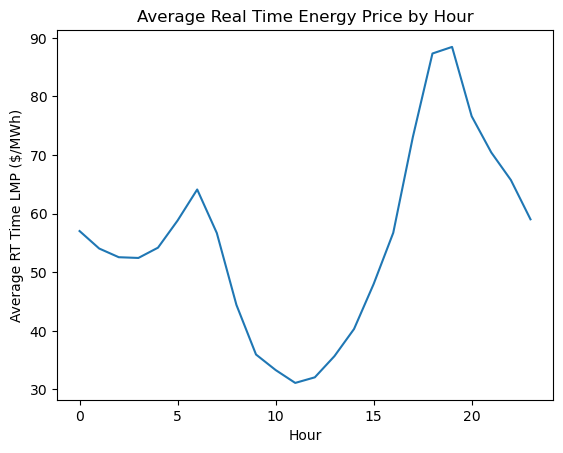

In [29]:
plt.plot(pd.pivot_table(df, values='Real_Time_LMP (Avg $/MWh)', index='hour'))
plt.xlabel('Hour')
plt.ylabel('Average RT Time LMP ($/MWh)')
plt.title('Average Real Time Energy Price by Hour')

plt.savefig('avg_RTLMP_by_hour.png', bbox_inches='tight')
plt.show()

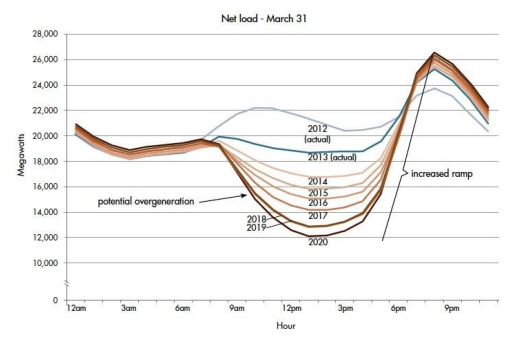

In [30]:
# Example of CAISO duck curve
plt.imshow(plt.imread('CAISO_DuckCurve_720_469_80.png'))
plt.axis('off')
plt.show()

Plotting the distribution of energy prices by hour compresses the box and whisker plots because of the large number of outliers. Let's also try removing outliers greater than 3x the IQR

Text(0.5, 1.0, 'Real Real Time Energy Price Distribution by Hour')

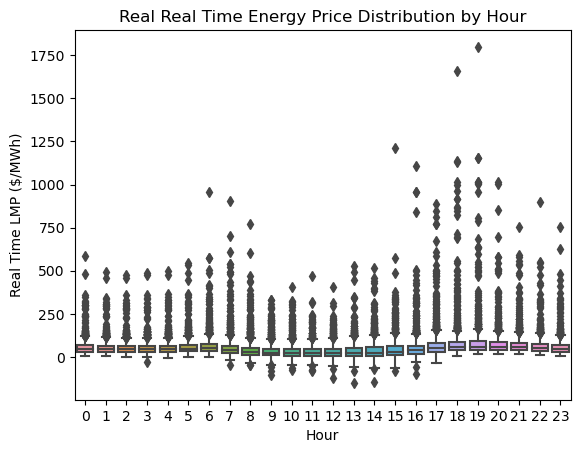

In [31]:
sns.boxplot(data=df, x='hour', y='Real_Time_LMP (Avg $/MWh)')

plt.xlabel('Hour')
plt.ylabel('Real Time LMP ($/MWh)')
plt.title('Real Real Time Energy Price Distribution by Hour')

In [32]:
def filter_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return series[(series >= lower_bound) & (series <= upper_bound)]

filtered_data = df.groupby('hour')['Real_Time_LMP (Avg $/MWh)'].apply(filter_outliers).reset_index()

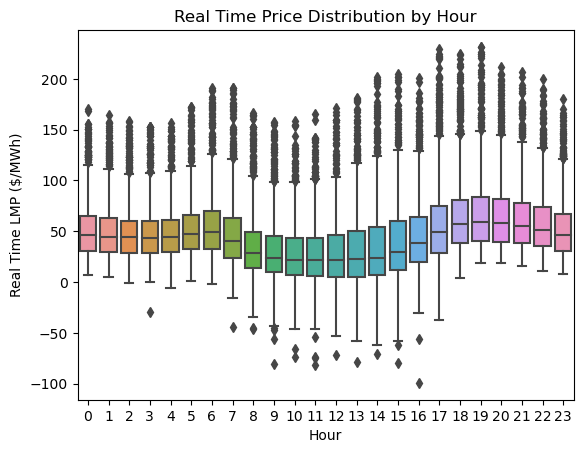

In [33]:
sns.boxplot(data=filtered_data, x='hour', y='Real_Time_LMP (Avg $/MWh)')
plt.xlabel('Hour')
plt.ylabel('Real Time LMP ($/MWh)')
plt.title('Real Time Price Distribution by Hour')
plt.show()

Plotting LMP and Generation by hour explains the bi-modal relationship between LMP and generation seen previously. Generation and LMP sometimes spike modestly in the mornings. Later in the evening, they spike to a much greater degree.

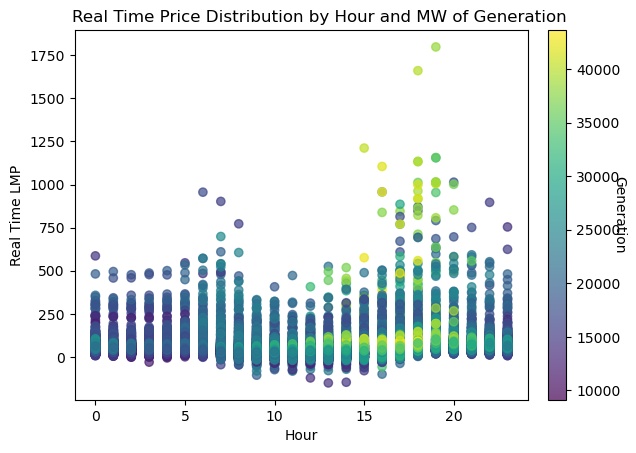

In [34]:
points = plt.scatter('hour', 'Real_Time_LMP (Avg $/MWh)', data=df, c='Generation (MW)', alpha=0.7)
plt.xlabel('Hour')
plt.ylabel('Real Time LMP')
cbar = fig.colorbar(points, fraction=0.046, pad=0.04)
cbar.ax.set_ylabel('Generation', rotation=270)
plt.title('Real Time Price Distribution by Hour and MW of Generation', loc='right')
plt.show()

Plotting LMP against Total Wind / Solar Generation and Renewables Forecast Error also validates my reasoning from the bivariate plots. LMP is likelier to spike and renewable forecast errors tends toward 0 when there is little generation from renewables on the grid.

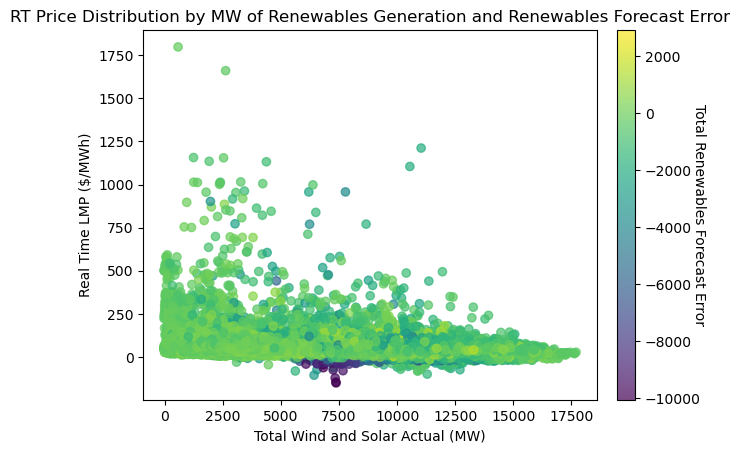

In [35]:
fig, ax = plt.subplots()
points = plt.scatter('Total_Wind_Solar_Actual (MW)', 'Real_Time_LMP (Avg $/MWh)', data=df, c='Renewable_Energy_Forecast_Error (MW)', alpha=0.7)
plt.xlabel('Total Wind and Solar Actual (MW)')
plt.ylabel('Real Time LMP ($/MWh)')
cbar = fig.colorbar(points, fraction=0.046, pad=0.04)
cbar.ax.set_ylabel('Total Renewables Forecast Error', rotation=270)
plt.title('RT Price Distribution by MW of Renewables Generation and Renewables Forecast Error', loc='center')
plt.show()

## Temperature

It appears below that high energy prices can occur during periods of high temperature. However, large generation volume also occurs during periods of high temperatures and prices

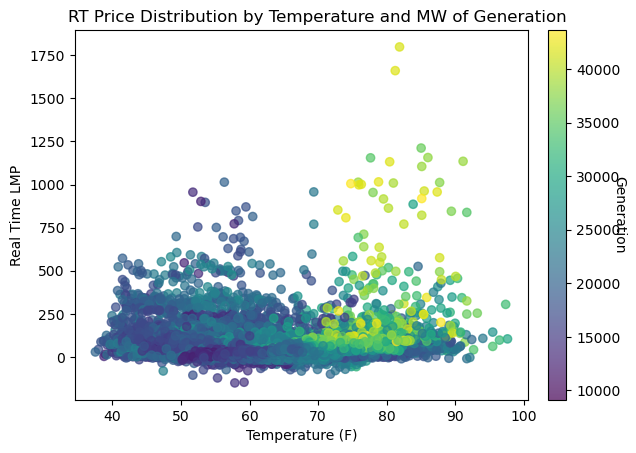

In [36]:
points = plt.scatter('temperature_2m', 'Real_Time_LMP_in_2_hrs (Avg $/MWh)', data=df, c='Generation (MW)', alpha=0.7)
plt.xlabel('Temperature (F)')
plt.ylabel('Real Time LMP')
cbar = fig.colorbar(points, fraction=0.046, pad=0.04)
cbar.ax.set_ylabel('Generation', rotation=270)
plt.title('RT Price Distribution by Temperature and MW of Generation', loc='right')
plt.show()

Running a simple linear regression of energy price on temperature gives no significant relationship. However, regressing on both temperature and generation results in a significantly negative coefficient for temperature and a significantly positive one for generation. I.e., holding generation constant, an increase in temperature decreases energy costs. There may be a few explanations for this that come to mind: <br>
-Increasing temperature without increasing generation may capture the effect of moving from a 'cold' temperature to a more moderate temperature (one with less usage of heat) <br>
-Time of day may also play a role. Temperature may spike around midday when energy use is relatively lower. Indeed this may be the case by looking at the plot of energy price, hour and temperature

In [37]:
import statsmodels.formula.api as smf

df_reg = df.rename({'Real_Time_LMP_in_2_hrs (Avg $/MWh)':'RTLMP', 'Generation (MW)':'generation'}, axis=1)
reg = smf.ols(formula='RTLMP ~ temperature_2m', data=df_reg).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  RTLMP   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6188
Date:                Sun, 03 Dec 2023   Prob (F-statistic):              0.432
Time:                        17:37:24   Log-Likelihood:            -1.5028e+05
No. Observations:               26662   AIC:                         3.006e+05
Df Residuals:                   26660   BIC:                         3.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         57.6908      3.011     19.

In [38]:
reg = smf.ols(formula='RTLMP ~ temperature_2m + generation', data=df_reg).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  RTLMP   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     1659.
Date:                Sun, 03 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:37:24   Log-Likelihood:            -1.4871e+05
No. Observations:               26662   AIC:                         2.974e+05
Df Residuals:                   26659   BIC:                         2.975e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         75.1485      2.856     26.

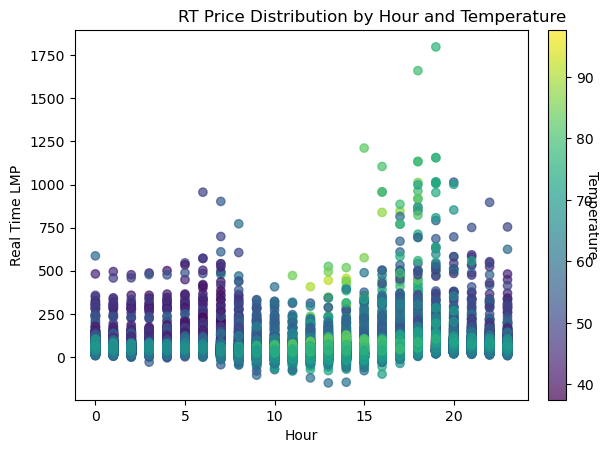

In [39]:
points = plt.scatter('hour', 'Real_Time_LMP (Avg $/MWh)', data=df, c='temperature_2m', alpha=0.7)
plt.xlabel('Hour')
plt.ylabel('Real Time LMP')
cbar = fig.colorbar(points, fraction=0.046, pad=0.04)
cbar.ax.set_ylabel('Temperature', rotation=270)
plt.title('RT Price Distribution by Hour and Temperature', loc='right')
plt.show()